In [1]:
# Dataframe and numeric manipulations
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Display preferences
pd.options.display.max_rows = 999
pd.set_option('display.float_format', str)

In [2]:
# Local module(s) to use
import wrangle as w
import explore as e

## Background on what the '1033 Program' is:
The '1033 Program' origin (per the official Federal program site):

*In the National Defense Authorization Act for fiscal years 1990 and 1991, Congress authorized the transfer of excess DoD property to federal, state and local law enforcement agencies. Congress later passed the NDAA for fiscal year 1997, which allows law enforcement agencies to acquire property for bona fide law enforcement purposes – particularly those associated with counter-drug and counter-terrorism activities. The program has been named in the press and elsewhere as the “1033 Program,” which refers to the numbered section of the 1997 NDAA that granted permanent authority to the Secretary of Defense to transfer defense material to federal, state and local law enforcement agencies.* 

The official site for this program: 
https://www.dla.mil/DispositionServices/Offers/Reutilization/LawEnforcement/PropertySearch.aspx

For a wider, quick summation of how this program came to being such resources may be useful:
- https://www.youtube.com/watch?v=60beeYMCmGI
    - A Business Insider overview of the program from the founding programs to modern 'creation'/extensions
- https://www.youtube.com/watch?v=8vr9UMepwU8
    - A short BBC overview of the program in a modern context

In short the US has a robust, well-established DoD to Police pipeline for military equipment. The US is, with intent, militarizing their Police departments with inconsistent oversight, irregular policy, and subdued transparency. 

However, as noted: **"Other equipment, such as Weapons, Aircrafts, and Tactical Vehicles, are not issued online. These items are coordinated through LESO Commodity Leads and State Coordinators."**

Yet, as any quick glance at the data shows the majority of items, in a monetary and quantitative sense, fall under these categories. **A lack of transparency surrounding this topic, the equipment itself, and the agencies involved seems to be intentional at both a federal and state level.**

The data for this report was collected from this Kaggle source:
https://www.kaggle.com/datasets/jpmiller/military-equipment-for-local-law-enforcement?select=dod_all_states.csv

For a robust and ongoing exploration of this data please see (no affiliation to myself):
https://project1033.org/

## Wrangle: Acquisition/Prepare
As previously stated this data was initially gathered from the above Kaggle webpage. It was largely already useable and only needed a few additional modifications. 

The preparation included handling the null values for *DEMIL_IC*, which was done by filling in 9910 values with '1'. This was done after inspecting the data for the most frequent value, but more importantly through research about the values themselves. The 1 value is largely the default value and since these are items that are being handled with intent it seemed a reasonable value to assign for our purposes. The other values are largely for specific demolition requirements or details and should be assigned already prior to the distribution of the equipment. You can see this explored in more depth in the workbooks provided.

Additionally, needed datatypes were modified for the *DEMIL_IC* code from a float to an object type and the *Ship_Date* was changed to a datetime type and used for the indexing of the dataframe. 

A column *total_value* was created using the *Acquisition_Value* and *Quantity* columns to better represent the value of the transactions. 

In [3]:
# Acquire and prepare (initially) the dataframe with our wrangle module
df = w.wrangle_1033()

In [4]:
# Quick glance at what the dataframe structure and information is
df.head()

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value
Ship_Date,,,,,,,,,,,
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0


## Exploration (w/ Initial Questions):

### Question: What is the overall distribution of equipment?
For the dataframe the main target variable will be considered *total_value* but *Quantity* is still worth consideration

In [5]:
# Our target variable
y = df.total_value

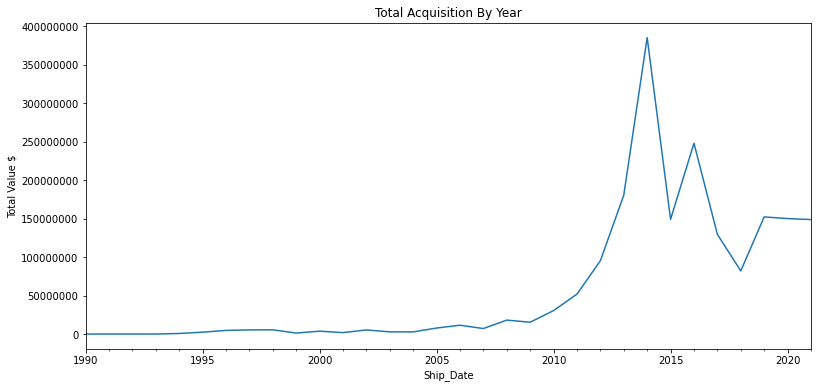

In [6]:
# Giving a visualization of the Yearly Total Acquisition of equipment by value
e.yearly_viz(df, y)

In [7]:
# Looking at the total distribution of equipment (in value) from the dataset. Almost 2 billion in total. 
df.total_value.sum()

1899669153.4699998

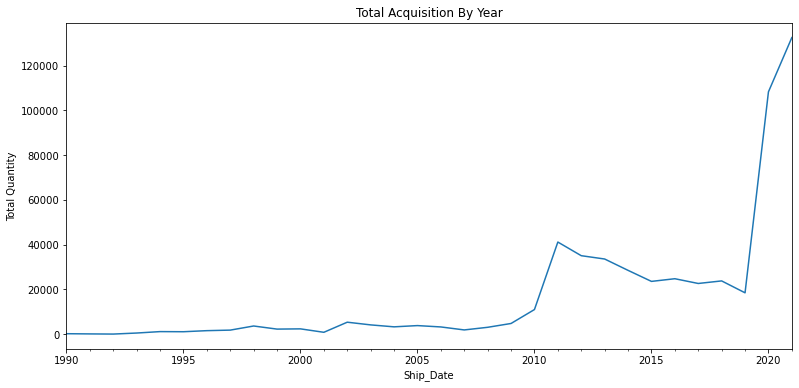

In [8]:
# Giving a visualizatino of the Yearly Total Acquisition of equipment by quantity 
e.quantity_viz(df)

In [9]:
# Looking at the total distribution of equipment (in quantity) from the dataset. ~550,000 units
df.Quantity.sum()

547434

### Question: What States/Regions are acquiring the most equipment? 


In [10]:
# The top acquisition in value by State
df.groupby('State').total_value.sum().sort_values(ascending=False).head(3)

State
TX   154744237.13
CA   154561125.85
TN   134388805.89
Name: total_value, dtype: float64

The top three States for acquisition are Texas, California, and Tennessee.

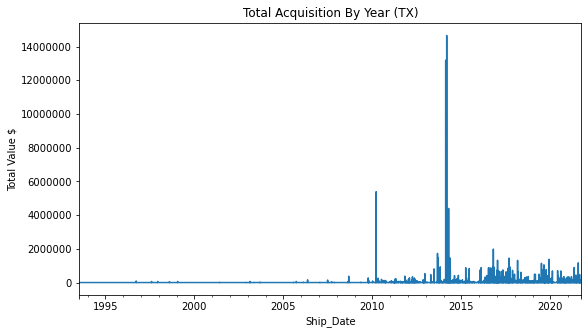

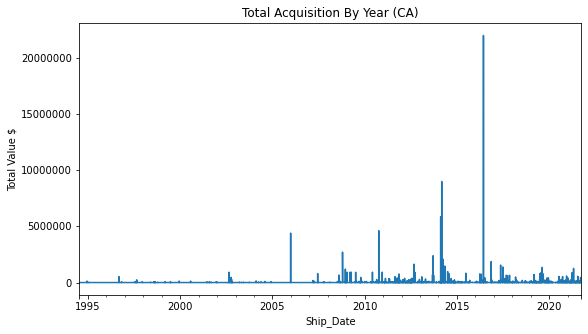

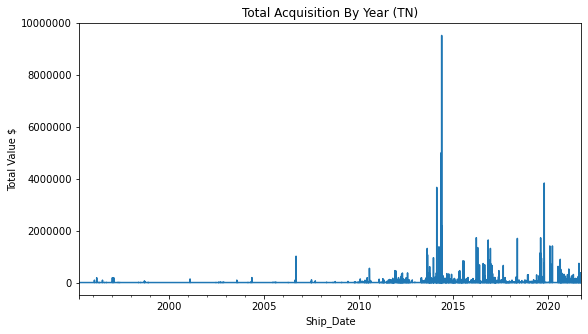

In [11]:
e.top_three(df)

### Question: What equipment is being acquired the most?

In [12]:
# Total count by Item_Name
df.Item_Name.value_counts().head(25)

RIFLE,5.56 MILLIMETER                      46843
RIFLE,7.62 MILLIMETER                      11146
SIGHT,REFLEX                               10899
PISTOL,CALIBER .45,AUTOMATIC                5664
TRUCK,UTILITY                               2634
ILLUMINATOR,INFRARED                        1954
NIGHT VISION GOGGLE                         1861
IMAGE INTENSIFIER,NIGHT VISION              1822
VIEWER,NIGHT VISION                         1517
SIGHT,THERMAL                               1339
SIGHT,NIGHT VISION SNIPERSCOPE              1213
SHOTGUN,12 GAGE,RIOT TYPE                   1192
MINE RESISTANT VEHICLE                      1141
MAGAZINE,CARTRIDGE                          1048
PISTOL, 40CAL, GLOCK GEN 3                   980
ILLUMINATOR,INTEGRATED,SMALL ARMS            835
UNMANNED VEHICLE,GROUND                      812
NIGHT VISION EQUIP, EMIT, REFLECTED RAD      485
BINOCULAR                                    433
OPTICAL SIGHTING AND RANGING EQUIPMENT       431
TELESCOPE,STRAIGHT  

The most frequent acquisition is for Arms and accessories for them.

### Question: What agencies are acquiring the most equipment? 

In [13]:
# The top 25 Agencies that are making acquisitions by frequency
df.groupby('State').Agency_Name.value_counts().sort_values(ascending=False).head(25)

State  Agency_Name                        
CA     TEHAMA CSO                             1402
SC     LAW ENFORCEMENT DIVISION               1177
MI     OAKLAND COUNTY  SHERIFF OFFICE         1147
OH     STATE HWY PATROL                       1033
CA     LOS ANGELES POLICE DEPARTMENT           924
AZ     ARIZONA DEPT OF PUBLIC SAFETY           696
TX     AUSTIN POLICE DEPT                      628
AL     TUSCALOOSA POLICE DEPT                  595
SC     BEAUFORT COUNTY SHERIFF'S OFFICE        559
CA     KERN COUNTY SHERIFF OFFICE              556
KY     STATE POLICE                            529
CA     VENTURA COUNTY SHERIFF OFFICE           498
AZ     MESA POLICE DEPT                        476
TX     PARKS AND WILDLIFE DEPT                 463
CA     LOS ANGELES CSD                         423
       SANTA BARBARA COUNTY SHERIFF OFFICE     418
TX     HOUSTON POLICE DEPT                     413
IL     CHICAGO POLICE DEPARTMENT               408
CA     ORANGE COUNTY SHERIFFS DEPT     

### Question: Inside each State/Region what was the highest value acquisition? 

In [14]:
# The top acquisition within each State/Region
df.groupby('State')[['Agency_Name', 'total_value', 'Item_Name', 'Quantity']].agg('max').sort_values(by='total_value', ascending=False)

,Agency_Name,total_value,Item_Name,Quantity
State,,,,
CA,YUBA COUNTY SHERIFF'S OFFICE,22000000.0,"YOKE ASSY,TAIL ROTO",2980
AZ,YUMA POLICE DEPT,17000000.0,"YOKE ASSY,MAIN ROTO",2004
FL,WINTER PARK POLICE DEPT,17000000.0,"YOKE ASSY,TAIL ROTO",800
OH,YOUNGSTOWN STATE UNIV PD ACAD HI_ED,7120400.0,"WRENCH,TORQUE",2860
NV,YERINGTON POLICE DEPT,5711920.0,"YOKE,TAIL ROTOR",75
TX,ZAVALA COUNTY SHERIFF'S OFFICE,5390000.0,"YOKE ASSY,TAIL ROTO",1000
TN,WILSON COUNTY SHERIFF'S OFFICE,5000000.0,"YOKE ASSY,TAIL ROTO",1800
IN,WOODBURN POLICE DEPT,5000000.0,"YOKE,RIVETER",316
KY,WORTHINGTON POLICE DEPARTMENT,3100000.0,"X-RAY EQUIP, SUPPLIES: MED, DENTAL, VET",774


### Question: Is there mostly an overlap for timelines of acquisition by State/Region?

Taking the top 150 Acquisitions by State/Region and graphing them on top of one another to see where the acquisition timelines align. The majority of the acquisitions fall between 2010 and 2017, as verified through additional exploration (that can be seen in the workbooks). 

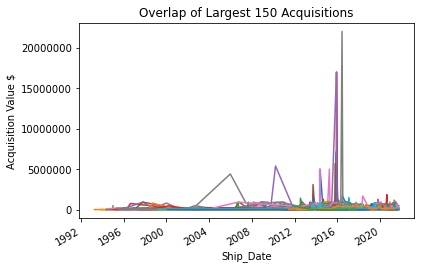

In [15]:
# The overlap visualization for each State/Region top 150 Acquisitions
e.overlap_viz(df)

### Question: What is the breakdown of some key categories (Guns, Vehicles, Planes)?

A rudimentary search for some keywords provides a general idea of how many of each category were acquired: (These are rough estimates and not exact)

In [16]:
# Number of Guns and gun accessories by frequent naming
len(df[df['Item_Name'].str.contains('RIFLE|SIGHT|PISTOL|SHOTGUN|MAGAZINE|BARREL|REVOLVER|CARTRIDGE|SUPPRESSOR')])

84846

In [17]:
# Number of vehicles by frequent naming
len(df[df['Item_Name'].str.contains('TRUCK|VEHICLE|VEHICLES')])

6519

In [18]:
# Number of helicopters/planes by frequent naming
len(df[df['Item_Name'].str.contains('HELICOPTER|AIRCRAFT')])

762

### Question: Is the distribution proactive or reactive? (Federal push or Regional request)

A method to test this involved seeing the range between a unique Item's ship dates. The idea was to see how many items had 0 days between their appearance in the dataset. If an item had 0 days it would appear that it was sent out all at once from the supplies at the Federal level. 

This produced a list of approximately 49% of the items in the dataset with 52% of the items having less than a month range. However, upon deeper consideration and investigation the vast majority of these items only appear in the dataset once. 

As a result the ability to conclude whether this is a 'push' endeavor from the Federal level (which brings to question the intent of the program) or a 'pull' from regional sources is inconclusive. I do not feel comfortable making a conclusion that the Federal level is 'pushing' their stock if these numbers could indicate something else (that a lot of the items in the dataset are unique instances of that item). 

The work for this can be seen in the explore_1033 workbook.

### Question: Which States/Regions have higher average acquisitions? 
For this question a One-Sample t-test was conducted for each State/Region. 

- The H0: The mean of {State} acquisitions = the mean of all acquisitions.
- The HA: The mean of {State} acquisitions > the mean of all acquisitions. 

Since this is testing for a greater value it is a one-tailed t-test and thus the returned t-value needed to be above 0. Every State/Region that is shown to be statistically significant returns a statement indicating this.

In [19]:
# Testing each State/Region for statistical significance of average acquisition by total_value
e.ttest_by_State(df)

The average acquisition by total_value: 14506.052776636427

We reject the null hypothesis. MS mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NY mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. TX mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. OR mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NC mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NM mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. WA mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NE mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. FL mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NV mean of acquisitions is > than the mean of all acqu

In total 12 of the 53 State/Region identifiers show a higher average acquisition value than the total average. 